## Understanding trends in a resort and city hotels business 

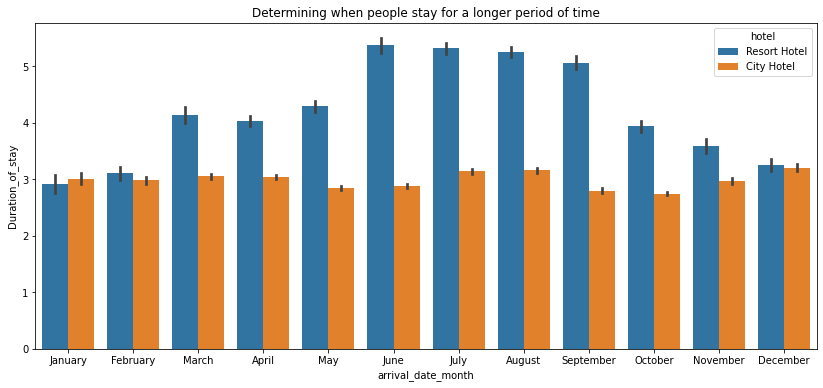

------------------------------------------------------------------------------------------------------------------
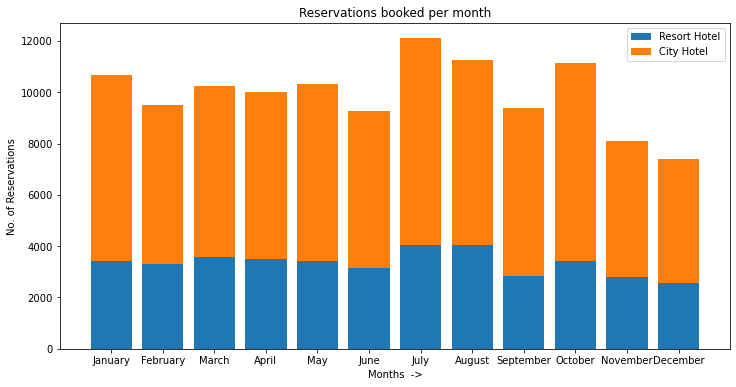

------------------------------------------------------------------------------------------------------------------

BB – Bed & Breakfast\
HB – Half board (breakfast and one other meal – usually dinner)\
FB – Full board (breakfast, lunch and dinner)\
SC – no meal package

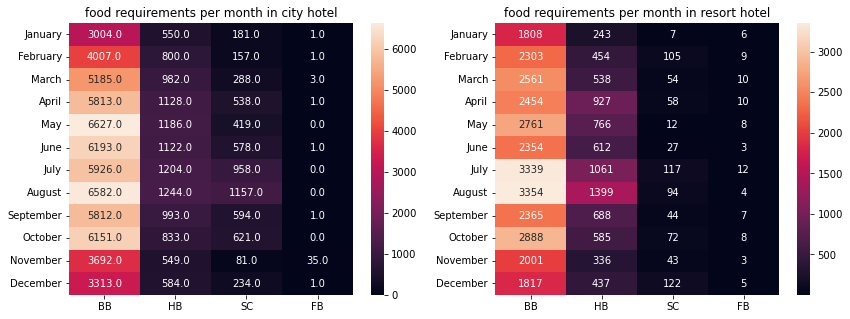

------------------------------------------------------------------------------------------------------------------
Contract - when the booking has an allotment or other type of contract associated to it\
Group – when the booking is associated to a group\
Transient – when the booking is not part of a group or contract, and is not associated to other transient booking\
Transient-party – when the booking is transient, but is associated to at least other transient booking
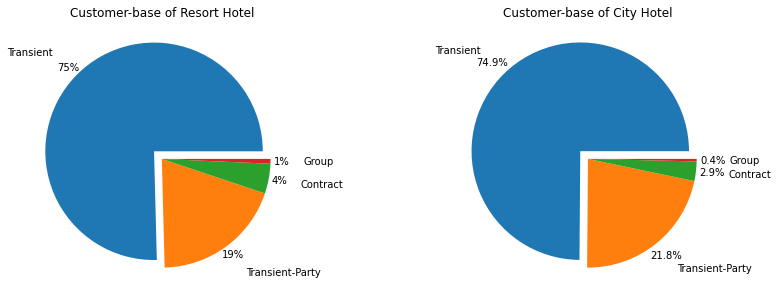

------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("hotel_bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
!pip install sorted-months-weekdays
!pip install sort-dataframeby-monthorweek

In [4]:
import sort_dataframeby_monthorweek as sd

def sort_data(df,columnname):
    return sd.Sort_Dataframeby_Month(df,columnname)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
# creating a column
months_df = df[['reservation_status_date','arrival_date_month','stays_in_weekend_nights','stays_in_week_nights','hotel']].copy()
months_df['Duration_of_stay'] = months_df.stays_in_week_nights + months_df.stays_in_weekend_nights
months_df = sort_data(months_df,'arrival_date_month')
months_df

,reservation_status_date,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,hotel,Duration_of_stay
0,2016-01-02,January,0,1,Resort Hotel,1
1,2016-01-02,January,0,1,Resort Hotel,1
2,2016-01-01,January,0,1,Resort Hotel,1
3,2016-01-03,January,0,2,Resort Hotel,2
4,2015-12-22,January,0,2,Resort Hotel,2
...,...,...,...,...,...,...
119385,2017-01-06,December,2,5,City Hotel,7
119386,2017-01-06,December,2,5,City Hotel,7
119387,2017-01-07,December,2,5,City Hotel,7
119388,2017-01-08,December,2,10,City Hotel,12


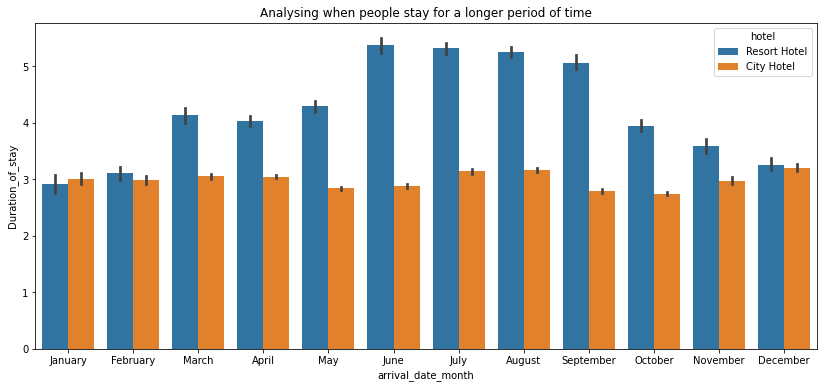

In [8]:
# figure out when people stay for a longerer period of time

plt.figure(figsize = (14,6))
plt.title("Analysing when people stay for a longer period of time")
sns.barplot(y='Duration_of_stay', x='arrival_date_month', hue='hotel', data=months_df);

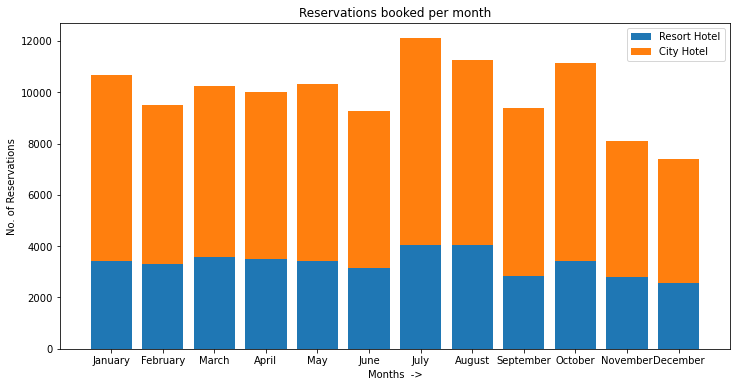

In [9]:
# figure out when we recive the most amount of reservations (bar)

reserv_df = df[['reservation_status_date','hotel']].copy()
reserv_df.reservation_status_date = pd.to_datetime(reserv_df.reservation_status_date)
reserv_df["month"] = pd.DatetimeIndex(reserv_df.reservation_status_date).month
reserv_df

temp1 = reserv_df[reserv_df.hotel == 'Resort Hotel']
temp2 = reserv_df[reserv_df.hotel == 'City Hotel']
x = temp1.month.value_counts().sort_index()
y = temp2.month.value_counts().sort_index()

# temp1.month.value_counts().sort_index().plot(kind = 'bar');
# temp2.month.value_counts().sort_index().plot(kind = 'bar');
plt.figure(figsize = (12,6))
plt.title("Reservations booked per month")
plt.bar(["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"],x.loc[:,]);
plt.bar(["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"],y.loc[:,],bottom = x.loc[:,]);



plt.legend(["Resort Hotel","City Hotel"]);
plt.xlabel("Months  ->");
plt.ylabel("No. of Reservations");

BB – Bed & Breakfast;
HB – Half board (breakfast and one other meal – usually dinner);
FB – Full board (breakfast, lunch and dinner);
SC – no meal package


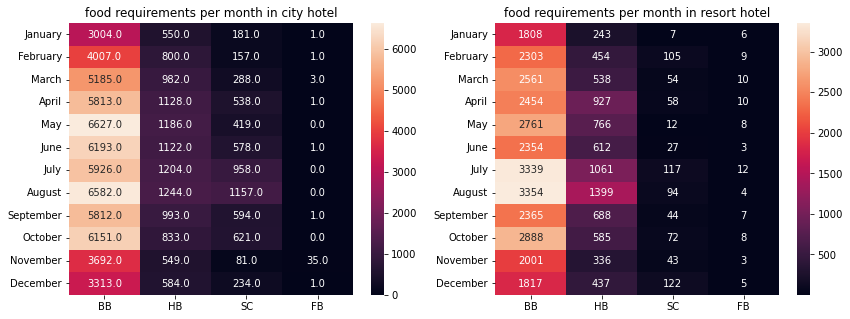

In [10]:
# figure out when we need to prepare the most amount of food (bar)
food_df = df[['meal','hotel','arrival_date_month']].copy()
food_df = food_df.drop(index = food_df[food_df.meal == 'Undefined'].index)
food_df = sort_data(food_df,'arrival_date_month')
rfood_df = food_df[food_df.hotel == 'Resort Hotel']
cfood_df = food_df[food_df.hotel == 'City Hotel']

def helper(df):
    _list = list()
    month =  ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
    for i in month:
        temp = df[df.arrival_date_month == i].meal.value_counts()
        _list.append(temp.loc[:].to_list())
    return _list

resort = pd.DataFrame(helper(rfood_df),columns= ['BB', 'HB', 'SC', 'FB'],index = ["January", "February", "March", "April","May", "June", "July", "August", "September", "October", "November", "December"])
city = pd.DataFrame(helper(cfood_df),columns= ['BB', 'HB', 'SC', 'FB'],index = ["January", "February", "March", "April","May", "June", "July", "August", "September", "October", "November", "December"])
city.fillna(0, inplace=True)

fig, axes = plt.subplots(1,2, figsize=(14, 5))
axes[0].set_title("food requirements per month in city hotel")
sns.heatmap(city, fmt=".1f", annot=True,ax = axes[0]);
axes[1].set_title("food requirements per month in resort hotel")
sns.heatmap(resort, fmt="d", annot=True,ax =axes[1]);
print("BB – Bed & Breakfast;\nHB – Half board (breakfast and one other meal – usually dinner);\nFB – Full board (breakfast, lunch and dinner);\nSC – no meal package")



In [11]:
# figure out at what month do we have the most people staying in the hotel (stack bar graph)
people_df = df[['adults','children' ,'babies' ,'hotel']].copy()

Contract - when the booking has an allotment or other type of contract associated to it;
Group – when the booking is associated to a group;
Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
Transient-party – when the booking is transient, but is associated to at least other transient booking


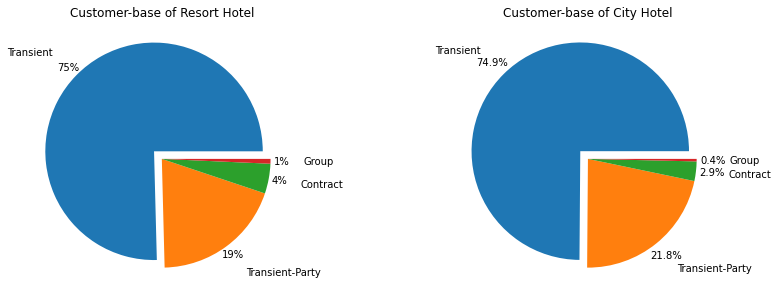

In [12]:
# understanding whats the customer-base of the hotel
customer_df = df[['customer_type','hotel']]
customer_df1 = customer_df[customer_df.hotel == 'Resort Hotel']
customer_df2 = customer_df[customer_df.hotel == 'City Hotel']
print("Contract - when the booking has an allotment or other type of contract associated to it;\nGroup – when the booking is associated to a group;\nTransient – when the booking is not part of a group or contract, and is not associated to other transient booking;\nTransient-party – when the booking is transient, but is associated to at least other transient booking")


fig, axes = plt.subplots(1,2, figsize=(14, 5))
cus1 = customer_df1.customer_type.value_counts()
cus2 = customer_df2.customer_type.value_counts()
axes[0].set_title("Customer-base of Resort Hotel")
axes[0].pie(cus1,labels = cus1.index,autopct='%1.0f%%',explode = (0.1,0,0,0),pctdistance=1.1, labeldistance=1.3)
axes[1].set_title("Customer-base of City Hotel")
axes[1].pie(cus2,labels = cus2.index,autopct='%0.1f%%',explode = (0.1,0,0,0),pctdistance=1.15, labeldistance=1.3)
plt.show()

in order to obeserve trends in sales....:
1) sales in each month per each product\
2) customer type / profession... etc

*entire dataset can be maintatined in one excel file by creating extra month column 



https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

In [14]:
newdf = pd.read_csv("https://raw.githubusercontent.com/kfrawee/SalesAnalysis/master/data/Sales_April_2019.csv")
newdf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [15]:
newdf.dropna()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"
